# **LLOYDS BANK DIGDATA CHALLENGE**

**Business Requirement**

Lloyds Banking Group is launching a new loans product. Prior to the launch they would like you to use historical customer data to:

> design a process which predicts the likelihood of a new customer not paying back their loan




**Data**

Lloyds Banking Group has provided a dataset of 18,324 customers who:

*   Previously held a loan
*   The status of that loan : did the customer pay back the loan or not:
      * Customers who paid back are categorised as 'Fully Paid'
      * Customers who did not pay back their loan are categorised as 'Charged off'

*  Other credit and product information that can be used to understand a customer's credit or financial behaviour


**Meta Data**

1. id:	A unique ID for the loan listing.
2. addr_state:	The US state provided by the borrower in the loan application (address)
3. annual_inc: 	The annual income provided by the borrower during registration.
4. emp_length:	Employment length in years. Possible values are   between 0 and 10 where 0 means less than one year and 10 means ten or more years. Data captured as categorical.
5. emp_title:	The job title supplied by the Borrower when applying for the loan.
home_ownership	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER
6. installment:	The monthly payment owed by the borrower if the loan originates.
7. loan_amnt: 	The listed amount of the loan applied for by the borrower. 
purpose	A category provided by the borrower for the loan request. 
8. term:	The number of payments on the loan. Values are in months and can be either 36 or 60.
9. int_rate:	Interest Rate on the loan
10 avg_cur_bal:	Average current balance of all current credit lending products / accounts
11. inq_last_12m: Number of credit inquiries (searches) in past 12 months
12. max_bal_bc:	Maximum current balance owed on all revolving accounts (a revolving account is a credit card or overdraft where the balance can fluctuate month on month)
13. mo_sin_old_il_acct:	Months since oldest bank installment account opened
14. mo_sin_old_rev_tl_op:	Months since oldest revolving account opened
15. mo_sin_rcnt_rev_tl_op:	Months since most recent revolving account opened
16. mo_sin_rcnt_tl:	Months since most recent account opened
17. mort_acc:	Number of mortgage accounts.
18. mths_since_last_delinq:	The number of months since the borrower's last delinquency (missed payment).
19. num_bc_tl:	Number of bankcard accounts
20. num_il_tl:	Number of installment accounts
21. num_op_rev_tl:	Number of open revolving accounts
22. num_tl_90g_dpd_24m:	Number of accounts 90 or more days past due in last 24 months
23. num_tl_op_past_12m:	Number of accounts 90 or more days past due in last 24 months
24. open_acc:	The number of open credit lines in the borrower's credit file.
25. percent_bc_gt_75:	Percentage of all bankcard accounts > 75% of limit.
26. pub_rec_bankruptcies:	Number of public record bankruptcies
27. total_acc: The total number of credit lines currently in the borrower's credit file
28. total_bal_ex_mort:	Total credit balance excluding mortgage
29. loan_status:	Current Status of Loan where customers have fully paid back their loan OR did not pay back their loan, in which case they are flagged as Charged-off

#**Import the Libraries**

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


#**Read the Data**

In [226]:
#Read the excel file
df = pd.read_excel('data.xlsx')

In [227]:
#first few rows (Transposed to see all the variables without scrolling left or right)
df.head().T

,0,1,2,3,4
id,802173,14518910,54333324,62247022,71986114
addr_state,CA,TX,NY,CA,TX
annual_inc,72000.00,97500.00,120000.00,130000.00,58296.00
emp_length,3 years,1 year,1 year,10+ years,10+ years
emp_title,CA. Dept. Of Corrections,Curriculum & Implementation Manager,Senior manager,Border Patrol Agent,Account Manager
home_ownership,MORTGAGE,RENT,RENT,RENT,MORTGAGE
installment,395.66,966.47,806.57,846.17,41.79
loan_amnt,12000,35000,25000,25225,1200
purpose,debt_consolidation,debt_consolidation,credit_card,debt_consolidation,other
term,36 months,60 months,36 months,36 months,36 months


#**Information about the Data**

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  object 
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  object 
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

##**Statistical Details of the Data**

In [229]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,18324.00,68326450.00,42457033.00,300918.00,34914236.00,68380228.00,97307841.00,170824945.00
annual_inc,18324.00,80176.00,64873.00,3000.00,47000.00,65000.00,95000.00,2616000.00
installment,18324.00,468.00,278.00,31.00,259.00,397.00,636.00,1504.00
loan_amnt,18324.00,15523.00,9349.00,1000.00,8000.00,14000.00,21000.00,40000.00
int_rate,18324.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
avg_cur_bal,17758.00,13467.00,16551.00,0.00,3129.00,7137.00,18436.00,341236.00
inq_last_12m,9395.00,2.00,3.00,0.00,1.00,2.00,3.00,28.00
max_bal_bc,9395.00,5729.00,5628.00,0.00,2170.00,4244.00,7357.00,99609.00
mo_sin_old_il_acct,17192.00,125.00,53.00,1.00,97.00,129.00,152.00,530.00
mo_sin_old_rev_tl_op,17760.00,181.00,95.00,5.00,116.00,164.00,231.00,674.00


1. The average annual income is around 80000 USD, average current balance is 13000 USD.
2. The average monthly payments is 468 USD.
3. The average loan amount requested is around 15000 and the maximum value requested is 40000
4. There are 6 public record of bankruptices all together.
5. The maximum average current balance of all current credit lending products / accounts is 341236.0

Now let's see who took the maximum loan and who have the maximum average current balance 

In [230]:
#Maximum loan amount
df[df['loan_amnt'] == 40000 ]

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
42,125363781,CA,270000.00,10+ years,VP Supply Chain,OWN,838.91,40000,home_improvement,60 months,...,5.00,4.00,0.00,3.00,9,25.00,0,23,74024.00,Fully Paid
180,125470067,NC,122000.00,10+ years,Director Raleigh Regional Office,MORTGAGE,1229.97,40000,credit_card,36 months,...,18.00,9.00,0.00,2.00,12,42.90,0,43,191276.00,Fully Paid
268,92902556,OR,170000.00,10+ years,Registered Nurse,OWN,1234.91,40000,house,36 months,...,4.00,4.00,0.00,1.00,7,0.00,0,18,17381.00,Fully Paid
320,125760039,NV,168000.00,10+ years,CEO,MORTGAGE,798.67,40000,home_improvement,60 months,...,3.00,15.00,0.00,0.00,18,10.00,0,30,42805.00,Charged Off
509,128255783,GA,67992.00,10+ years,Staff up,OWN,858.18,40000,house,60 months,...,4.00,5.00,0.00,0.00,6,0.00,0,10,4449.00,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17825,104321627,CA,96000.00,8 years,Driver,MORTGAGE,920.19,40000,major_purchase,60 months,...,3.00,12.00,0.00,1.00,16,0.00,0,23,30469.00,Fully Paid
18092,100450504,VA,185000.00,10+ years,Financial Economist,MORTGAGE,1386.42,40000,debt_consolidation,36 months,...,6.00,24.00,0.00,3.00,28,60.00,0,47,240562.00,Fully Paid
18165,92951771,TX,150000.00,10+ years,President,MORTGAGE,1316.95,40000,small_business,36 months,...,2.00,11.00,0.00,2.00,12,0.00,0,14,4722.00,Fully Paid
18275,130142394,CO,86000.00,2 years,Gas instaler,MORTGAGE,1280.01,40000,major_purchase,36 months,...,7.00,6.00,0.00,4.00,7,0.00,0,24,4591.00,Fully Paid


There are 179 custOmers that took maximum loan amount of 40000 USD

In [231]:
#Let's see who is the 
df[df['avg_cur_bal'] == 341236.0]

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
2008,76181735,CA,90852.00,10+ years,O & M Tech 4,MORTGAGE,513.93,21000,major_purchase,60 months,...,5.00,2.00,0.00,0.00,4,100.00,1,13,9141.00,Fully Paid


There was one off record of average current balance and the customer has a bankruptciy but the loan was fully paid over a period of 60 months.

##**Missing Data/Null Values**

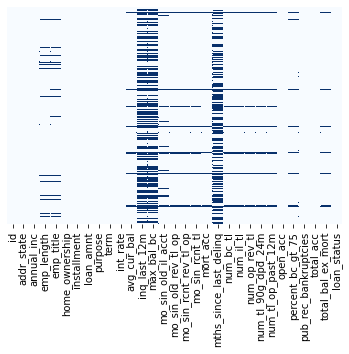

In [232]:
# Let's see if we have any missing data
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

There are several null values in may columns. Let's now see the count of these for each variable.

In [233]:
df.isnull().sum()

id                           0
addr_state                   0
annual_inc                   0
emp_length                1174
emp_title                 1282
home_ownership               0
installment                  0
loan_amnt                    0
purpose                      0
term                         0
int_rate                     0
avg_cur_bal                566
inq_last_12m              8929
max_bal_bc                8929
mo_sin_old_il_acct        1132
mo_sin_old_rev_tl_op       564
mo_sin_rcnt_rev_tl_op      564
mo_sin_rcnt_tl             564
mort_acc                   398
mths_since_last_delinq    9048
num_bc_tl                  564
num_il_tl                  564
num_op_rev_tl              564
num_tl_90g_dpd_24m         564
num_tl_op_past_12m         564
open_acc                     0
percent_bc_gt_75           610
pub_rec_bankruptcies         0
total_acc                    0
total_bal_ex_mort          398
loan_status                  0
dtype: int64

**Action plan to be taken for null values.**


1. emp_title: Drop this column as it could not provide much information
2. emp_length : Replace the null values with zeros
3. avg_cur_bal : Replace with the mean value of the variable
4. inq_last_12m : Drop this column as it won't contribute much.
5. max_bal_bc : Drop this column as it is not important
6. mo_sin_old_il_acct : Drop this column as well, as it is not important
7. mo_sin_old_rev_tl_op : Drop this column, as it is not important
8. mo_sin_rcnt_rev_tl_op : Drop this column as well, as it is not important
9. mort_acc : Replace with 0 for all the null values
10. mths_since_last_delinq : Replace with 0 for all the null values
11. num_bc_tl : Replace with the minimum value of the variable
12. num_il_tl : Replace with the minimum value of the variable
13. num_op_rev_tl: Replace with the minimum value of the variable
14. num_tl_90g_dpd_24m : Replace with the minimum value of the variable
15. num_tl_op_past_12m :  Replace with the minimum value of the variable
16. percent_bc_gt_75 : Replace with minimum value of the variable
17. total_bal_ex_mort : The null value of this column directly related to the null value on mort_acc. Hence replace this column value with the value of avg_cur_bal of that customer.


In [234]:
#replacement with zeros
df.loc[(df['emp_length'].isnull() == True), 'emp_length'] = 0
df.loc[(df['mort_acc'].isnull() == True), 'mort_acc'] = 0
df.loc[(df['mths_since_last_delinq'].isnull() == True), 'mths_since_last_delinq'] = 0

In [235]:
#replacement with mean value
df.loc[(df['avg_cur_bal'].isnull() == True), 'avg_cur_bal'] = df['avg_cur_bal'].mean()

In [236]:
#replacement with minimum value
df.loc[(df['num_bc_tl'].isnull() == True), 'num_bc_tl'] = df['num_bc_tl'].min()
df.loc[(df['num_il_tl'].isnull() == True), 'num_il_tl'] = df['num_il_tl'].min()
df.loc[(df['num_op_rev_tl'].isnull() == True), 'num_op_rev_tl'] = df['num_op_rev_tl'].min()
df.loc[(df['num_tl_90g_dpd_24m'].isnull() == True), 'num_tl_90g_dpd_24m'] = df['num_tl_90g_dpd_24m'].min()
df.loc[(df['num_tl_op_past_12m'].isnull() == True), 'num_tl_op_past_12m'] = df['num_tl_op_past_12m'].min()
df.loc[(df['percent_bc_gt_75'].isnull() ==  True), 'percent_bc_gt_75'] = df['percent_bc_gt_75'].min()


In [237]:
#replacement with values from other columns
df.total_bal_ex_mort.fillna(df.avg_cur_bal, inplace = True)

In [238]:
#Drop
df = df.drop(['emp_title','inq_last_12m','max_bal_bc','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl'], axis = 1)

In [239]:
#Now, Let's check again
df.isnull().sum()

id                        0
addr_state                0
annual_inc                0
emp_length                0
home_ownership            0
installment               0
loan_amnt                 0
purpose                   0
term                      0
int_rate                  0
avg_cur_bal               0
mort_acc                  0
mths_since_last_delinq    0
num_bc_tl                 0
num_il_tl                 0
num_op_rev_tl             0
num_tl_90g_dpd_24m        0
num_tl_op_past_12m        0
open_acc                  0
percent_bc_gt_75          0
pub_rec_bankruptcies      0
total_acc                 0
total_bal_ex_mort         0
loan_status               0
dtype: int64

##**Duplicates**

In [240]:
#let's see if any duplicates are there in the data
df.duplicated().sum()

0

No duplicates in the data

In [241]:
#number of columns after null values removal
len(df.columns)

24

In [242]:
#Let's see the information of the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              18324 non-null  object 
 4   home_ownership          18324 non-null  object 
 5   installment             18324 non-null  float64
 6   loan_amnt               18324 non-null  int64  
 7   purpose                 18324 non-null  object 
 8   term                    18324 non-null  object 
 9   int_rate                18324 non-null  float64
 10  avg_cur_bal             18324 non-null  float64
 11  mort_acc                18324 non-null  float64
 12  mths_since_last_delinq  18324 non-null  float64
 13  num_bc_tl               18324 non-null  float64
 14  num_il_tl               18324 non-null

# **Cleaning of the Data**

##Dropping unwanted columns

In [243]:
#let's drop id, addr_state as it doesnot carry any useful information
df.drop(['addr_state'], axis = 1, inplace = True)

In [244]:
#the id column also doesnot carry any information towards the loan_status, hence drop that column as well
df.drop(['id'], axis = 1, inplace = True)

In [245]:
#let's drop emp_length column as well, as it wont be of any use.

df.drop('emp_length', axis= 1, inplace = True)

In [246]:
#Similarly, let's drop purpose column
df.drop('purpose', axis= 1, inplace = True)

In [247]:
#Let's see the unique values in term column
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

##Encoding the categorical variables to numerical variables

In [248]:
#This needs to be converted to numerical column by replacing the string values
df['term'] = df['term'].replace(' 36 months', 36)
df['term'] = df['term'].replace(' 60 months', 60)

In [249]:
#Let's check the unique values again
df.term.unique()

array([36, 60])

In [250]:
#Let's label encode the loan_status column
le = LabelEncoder()
label = le.fit_transform(df['loan_status'])
df.drop("loan_status", axis=1, inplace=True)
df['loan_status'] = label

1- paid off 

0- charged off

In [251]:
#let's find the unique categories for the home_ownership 
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'], dtype=object)

In [252]:
#frequency of occurance of the various categories
df['home_ownership'].value_counts().sort_values(ascending = False)

MORTGAGE    8880
RENT        7382
OWN         2048
ANY           13
OTHER          1
Name: home_ownership, dtype: int64

In [253]:
#We can convert the OTHER category of home_ownership to ANY as it is more meaningful.
df.loc[(df['home_ownership'] == 'OTHER'), 'home_ownership'] = 'ANY'


In [254]:
#frequency of occurance of the various categories
df['home_ownership'].value_counts().sort_values(ascending = False)

MORTGAGE    8880
RENT        7382
OWN         2048
ANY           14
Name: home_ownership, dtype: int64

In [255]:
#Let's change the home_ownership column now using one hot encoding
ohe = pd.get_dummies(data=df, columns=['home_ownership'])

In [256]:
ohe

,annual_inc,installment,loan_amnt,term,int_rate,avg_cur_bal,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,...,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,72000.00,395.66,12000,36,0.11,13466.60,0.00,0.00,0.00,0.00,...,16,0.00,0,23,13466.60,1,0,1,0,0
1,97500.00,966.47,35000,60,0.22,7019.00,4.00,0.00,14.00,2.00,...,13,87.50,0,24,84227.00,1,0,0,0,1
2,120000.00,806.57,25000,36,0.10,4891.00,0.00,53.00,11.00,2.00,...,8,100.00,0,16,39124.00,1,0,0,0,1
3,130000.00,846.17,25225,36,0.13,17619.00,4.00,41.00,9.00,9.00,...,8,50.00,0,24,123331.00,1,0,0,0,1
4,58296.00,41.79,1200,36,0.15,12321.00,1.00,0.00,7.00,7.00,...,9,100.00,0,17,51794.00,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,300000.00,164.22,5000,36,0.11,67491.00,3.00,0.00,8.00,22.00,...,15,83.30,0,46,319418.00,1,0,1,0,0
18320,120000.00,455.96,14000,36,0.11,15445.00,3.00,16.00,9.00,22.00,...,22,25.00,0,38,63774.00,1,0,1,0,0
18321,85000.00,390.36,11925,36,0.11,21682.00,4.00,30.00,9.00,10.00,...,17,71.40,0,31,72686.00,1,0,1,0,0
18322,22000.00,213.89,6000,36,0.17,843.00,0.00,83.00,5.00,1.00,...,6,66.70,0,13,5058.00,1,0,0,0,1


In [257]:
#the info of the new dataframe
ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annual_inc               18324 non-null  float64
 1   installment              18324 non-null  float64
 2   loan_amnt                18324 non-null  int64  
 3   term                     18324 non-null  int64  
 4   int_rate                 18324 non-null  float64
 5   avg_cur_bal              18324 non-null  float64
 6   mort_acc                 18324 non-null  float64
 7   mths_since_last_delinq   18324 non-null  float64
 8   num_bc_tl                18324 non-null  float64
 9   num_il_tl                18324 non-null  float64
 10  num_op_rev_tl            18324 non-null  float64
 11  num_tl_90g_dpd_24m       18324 non-null  float64
 12  num_tl_op_past_12m       18324 non-null  float64
 13  open_acc                 18324 non-null  int64  
 14  percent_bc_gt_75      

There are no object or string columns now, the variable count decreased to 22.

#**Visualization**

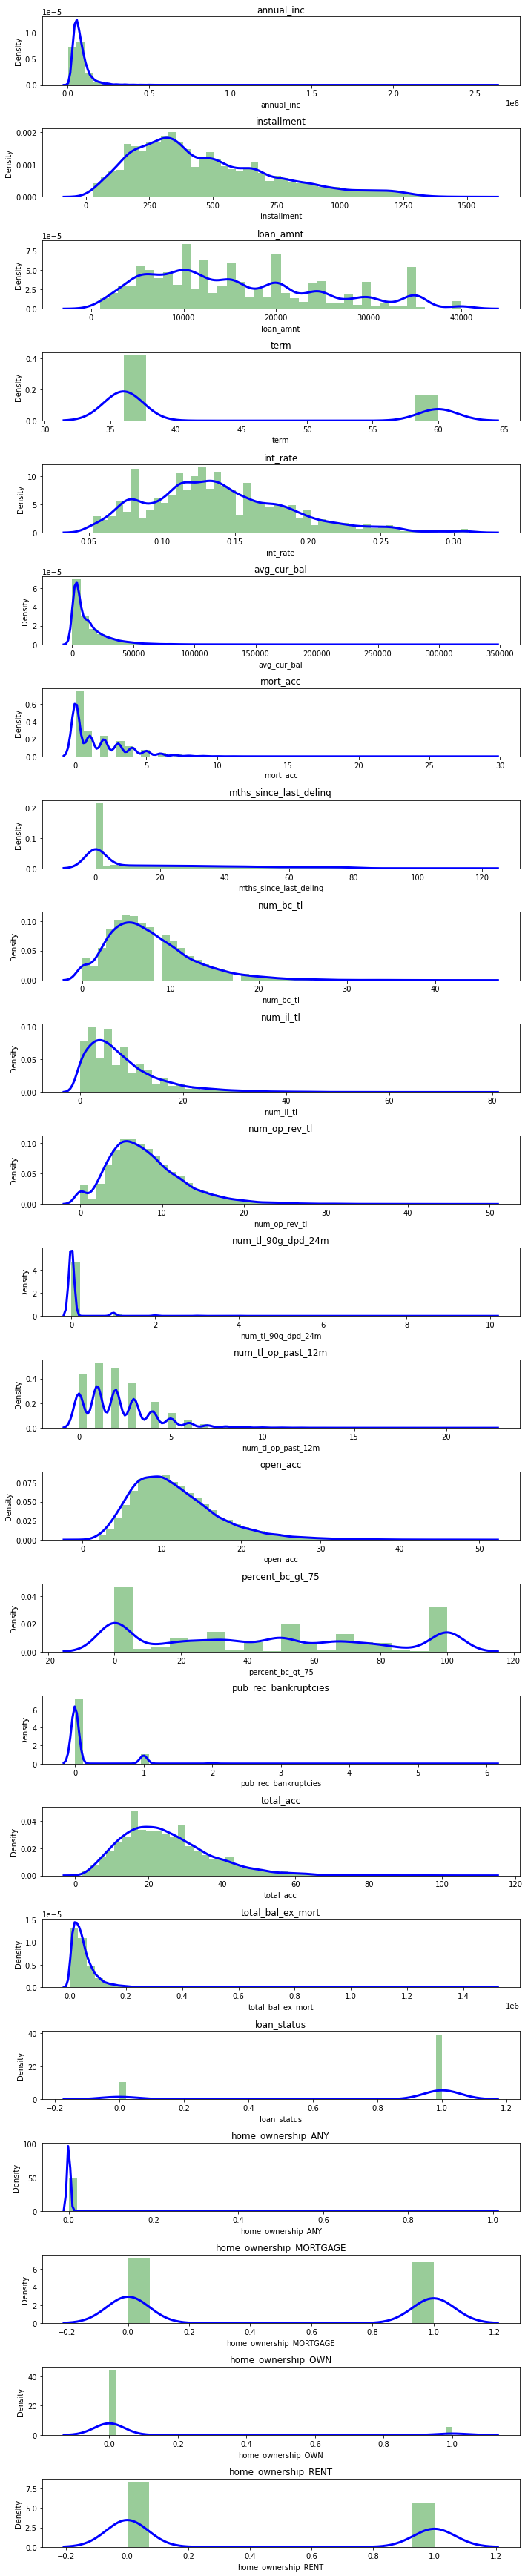

In [258]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(ohe.columns)):
  plt.subplot(24, 1, i+1)
  sns.distplot(ohe[ohe.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(ohe.columns[i])

plt.tight_layout()


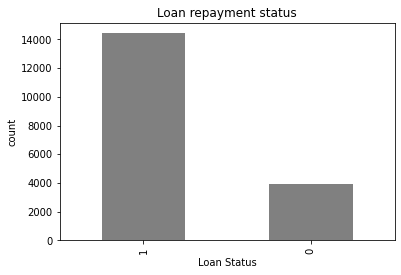

In [259]:
#Let's see the count of the paid back and charged off loans
ohe['loan_status'].value_counts().plot(xlabel='Loan Status', ylabel='count',color = 'Grey',kind ='bar', title = 'Loan repayment status');


The number of charged-off cases are very less when compared to the paid one's.

In [260]:
ohe.groupby(['term','loan_status']).count()

annual_inc  installment  loan_amnt  int_rate  avg_cur_bal  \
term loan_status                                                              
36   0                  2244         2244       2244      2244         2244   
     1                 10876        10876      10876     10876        10876   
60   0                  1662         1662       1662      1662         1662   
     1                  3542         3542       3542      3542         3542   

                  mort_acc  mths_since_last_delinq  num_bc_tl  num_il_tl  \
term loan_status                                                           
36   0                2244                    2244       2244       2244   
     1               10876                   10876      10876      10876   
60   0                1662                    1662       1662       1662   
     1                3542                    3542       3542       3542   

                  num_op_rev_tl  ...  num_tl_op_past_12m  open_acc  \
term loan_status                 ...                                 
36   0                     2244  ...                2244      2244   
     1                    10876  ...               10876     10876   
60   0                     1662  ...                1662      1662   
     1                     3542  ...                3542      3542   

                  percent_bc_gt_75  pub_rec_bankruptcies  total_acc  \
term loan_status                                                      
36   0                        2244                  2244       2244   
     1                       10876                 10876      10876   
60   0                        1662                  1662       1662   
     1                        3542                  3542       3542   

                  total_bal_ex_mort  home_ownership_ANY  \
term loan_status                                          
36   0                         2244                2244   
     1                        10876               10876   
60   0                         1662                1662   
     1                         3542                3542   

                  home_ownership_MORTGAGE  home_ownership_OWN  \
term loan_status                                                
36   0                               2244                2244   
     1                              10876               10876   
60   0                               1662                1662   
     1                               3542                3542   

                  home_ownership_RENT  
term loan_status                       
36   0                           2244  
     1                          10876  
60   0                           1662  
     1                           3542  

[4 rows x 21 columns]

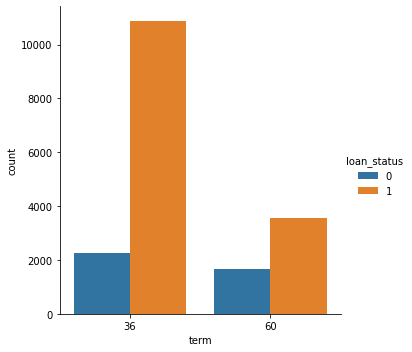

In [261]:
sns.catplot(data=ohe,kind='count',x='term',hue='loan_status')

The rate of "charged-off" loan repayment is more with long term loans. The percentage in 5 year is almost double as that of 3 years.

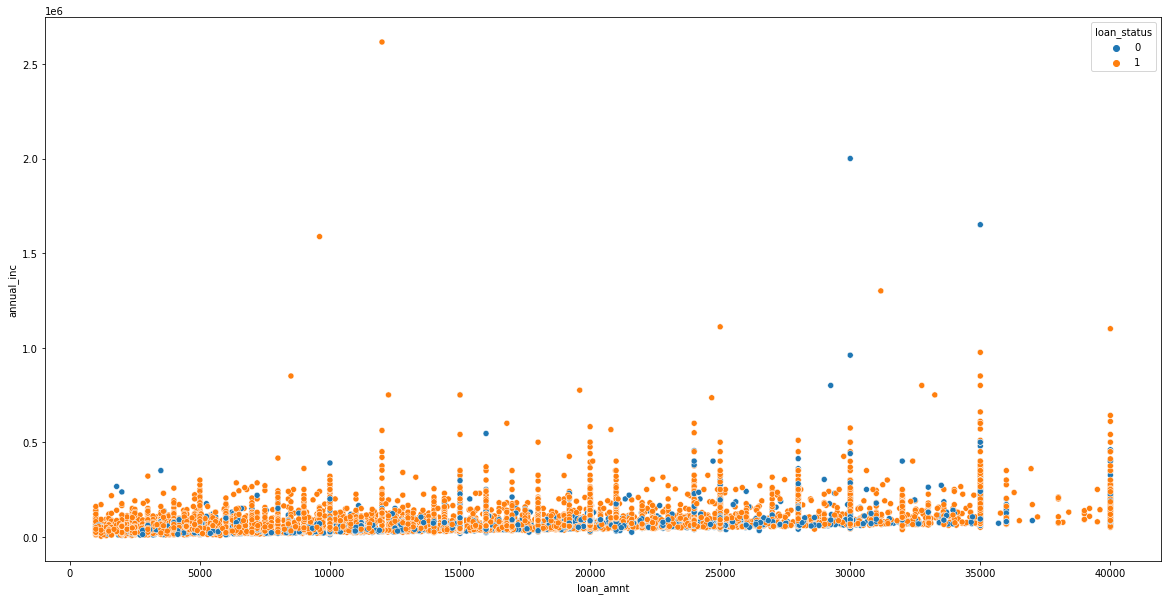

In [262]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="loan_amnt", y="annual_inc", data=ohe, hue="loan_status")


The more cases of loan non-repayment occurs for a loan amount of 20000 to 35000 for an income less than 250000. The higher the annual income less are the chances of the loan charged off.

#**Correlations**

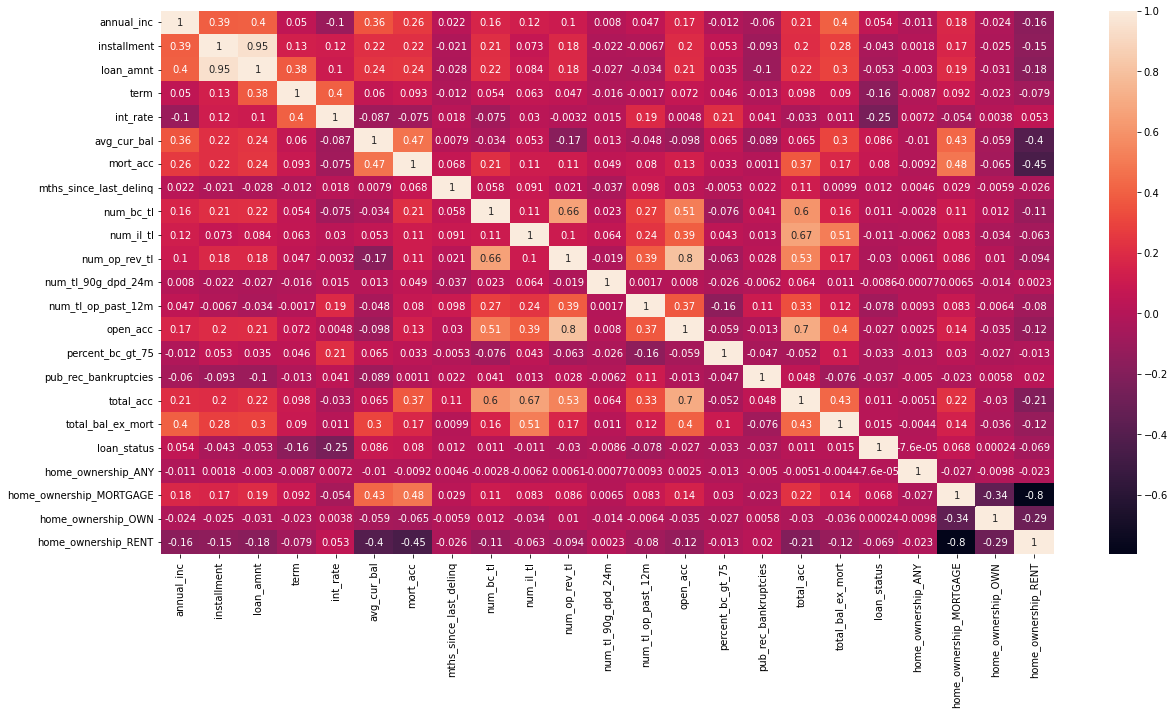

In [264]:
correlations = ohe.corr()
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot = True)


There is not much of correlation between the output and input variables.
However there are some inter-correlation between the variables itself.

# **Outliers**

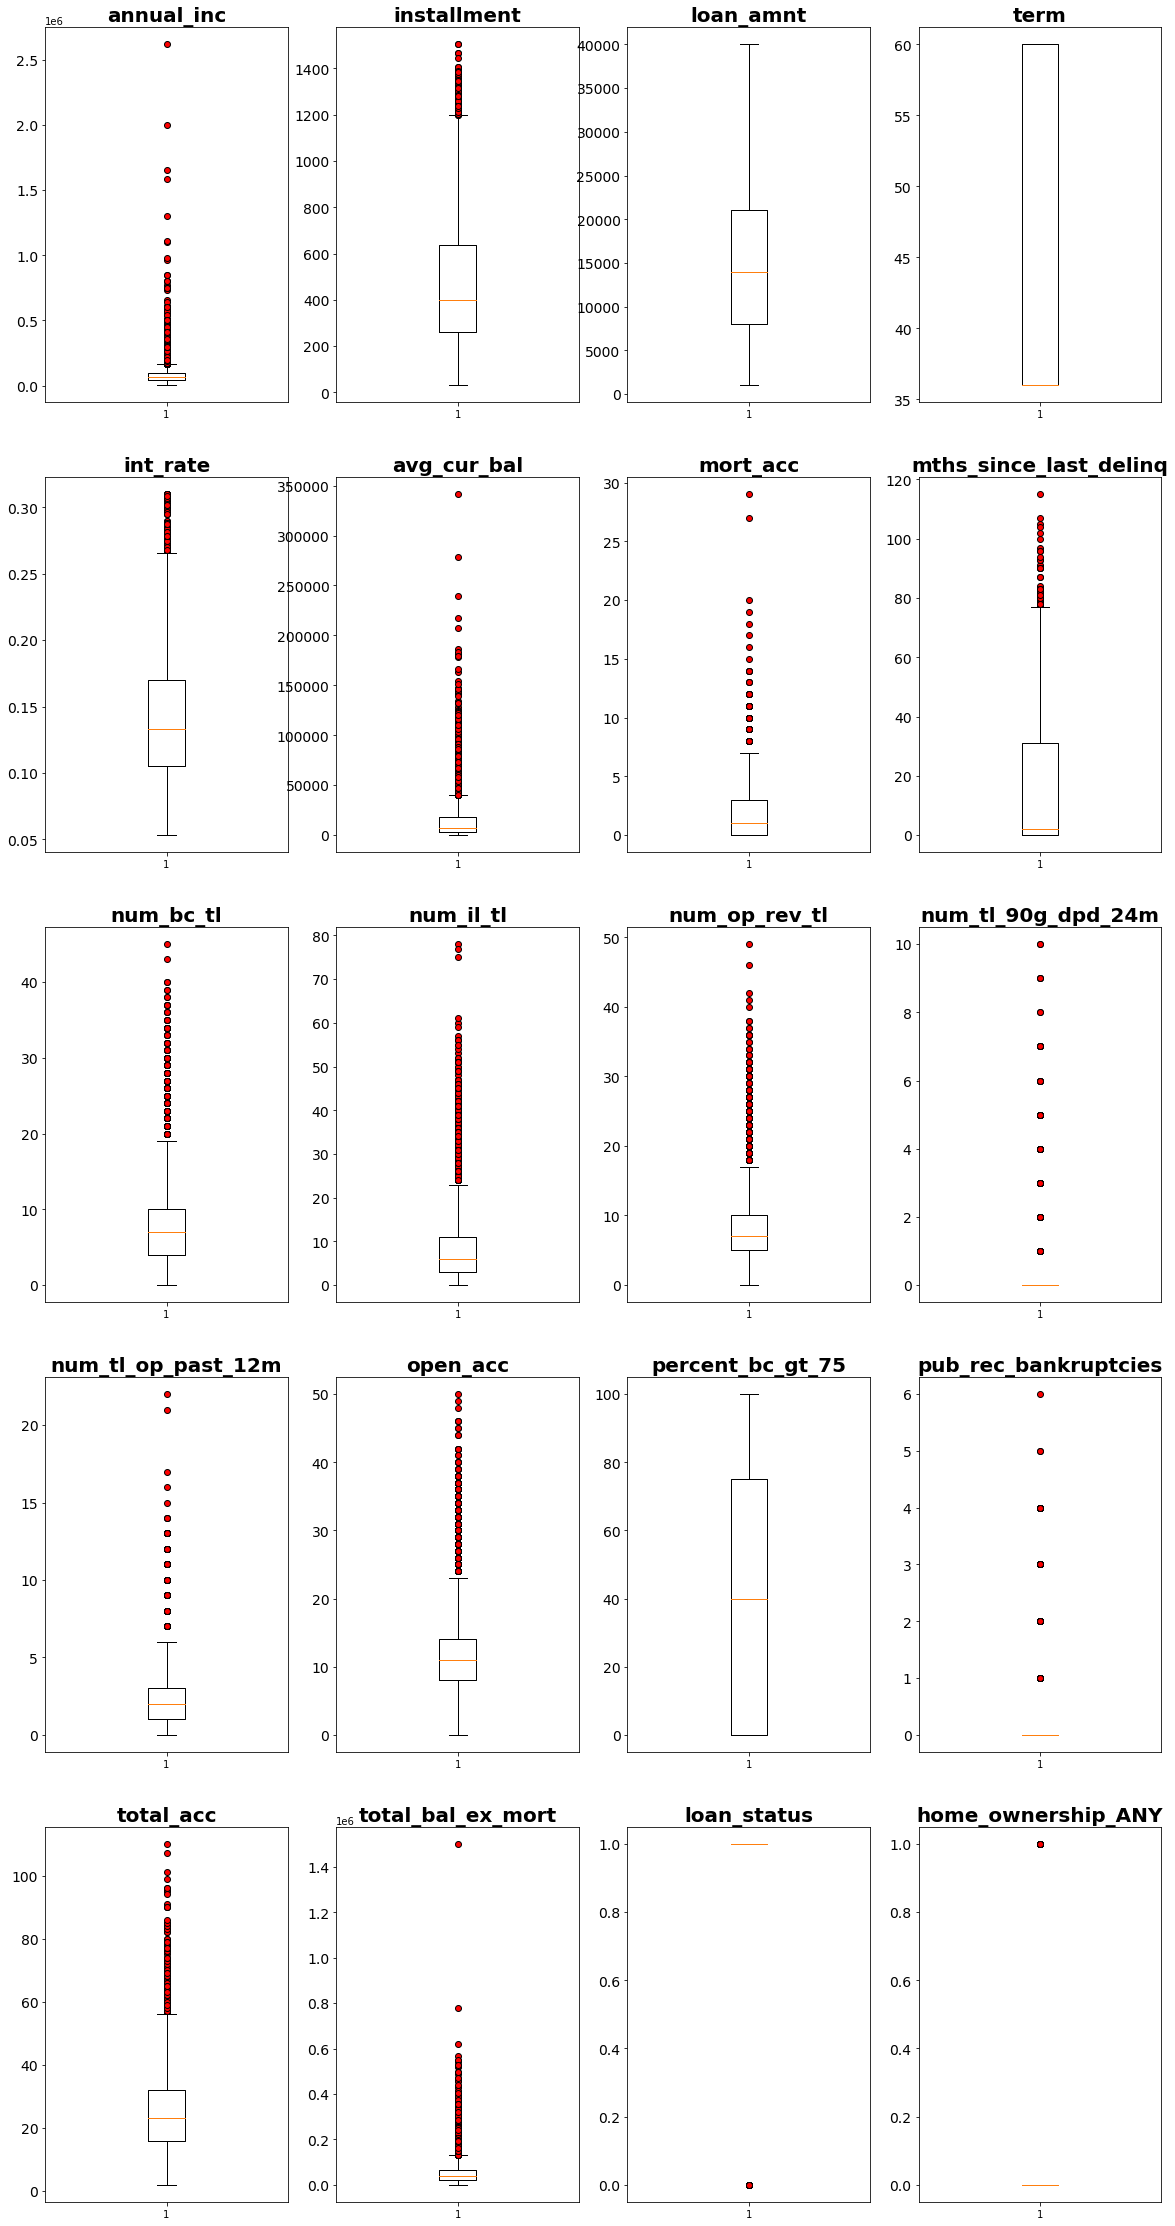

In [265]:
#plotting boxplot
properties = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'black')
fig, ax = plt.subplots(5, int(((len(ohe.columns)-2)/5)), figsize = (20, 40))

for i, ax in enumerate(ax.flat):
    ax.boxplot(ohe.iloc[:,i], flierprops =  properties)
    ax.set_title(ohe.columns[i], fontsize = 20, fontweight= 'bold')
    ax.tick_params(axis= 'y', labelsize = 14)
plt.tight_layout;


There are several outliers in many of the columns, however it is not advisable to remove outliers in this scenario as we have to find out the cases where the loan would be not paid back. This could happen as an outlier situation in any of these variables. Hence I am going to keep all the outliers in the data set.

# **Data Preprocessing**

In [266]:
#Let's separate the dependent and independent variables
y = ohe.loan_status.values
x = ohe.loc[:, ohe.columns!='loan_status'].values

# **Models using LazyPredict**

In [267]:
#install Lazypredict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [268]:
#import lazypredict 
import lazypredict

In [269]:
# import the classification library and train test split library
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [270]:
#Let's separate train and test for input and output variables
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.5,random_state =123)

#Build an instance and fit the classification algorithms
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:59<00:00,  2.05s/it]


In [271]:
#Let's see the models
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.64,0.63,0.63,0.67,0.04
GaussianNB,0.75,0.59,0.59,0.74,0.07
QuadraticDiscriminantAnalysis,0.74,0.58,0.58,0.73,0.05
PassiveAggressiveClassifier,0.69,0.57,0.57,0.70,0.05
Perceptron,0.71,0.57,0.57,0.72,0.06
BernoulliNB,0.78,0.57,0.57,0.75,0.05
BaggingClassifier,0.75,0.55,0.55,0.73,1.09
DecisionTreeClassifier,0.68,0.54,0.54,0.69,0.27
LabelPropagation,0.70,0.54,0.54,0.70,15.34


In [272]:
models.max()

Accuracy             0.80
Balanced Accuracy    0.63
ROC AUC              0.63
F1 Score             0.75
Time Taken          15.34
dtype: float64

Based on the comparative measures, there are several classification models with almost same output metrics. However, we are going to go with Logistic Regression, as it is one of the top suited model in this case.


#**Model**

In [273]:
#Let's build a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs', max_iter=7600)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=7600)

In [274]:
#Let's predict using the built model
y_pred_lr = lr_model.predict(X_test)

In [275]:
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1])

# **Feature importance**

In [276]:
#Column names 
column_names = ['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate',
       'avg_cur_bal', 'mort_acc', 'mths_since_last_delinq', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'total_acc', 'total_bal_ex_mort', 
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT']

In [277]:
#Add the column names to the X_train 
X_train = pd.DataFrame(X_train, columns = column_names)


In [278]:
X_train

,annual_inc,installment,loan_amnt,term,int_rate,avg_cur_bal,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,...,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,43000.00,180.69,5000.00,36.00,0.18,63557.00,3.00,4.00,4.00,2.00,...,0.00,4.00,0.00,0.00,13.00,14046.00,0.00,1.00,0.00,0.00
1,85000.00,723.98,22800.00,36.00,0.09,32318.00,1.00,0.00,21.00,3.00,...,1.00,9.00,66.70,0.00,26.00,42116.00,0.00,1.00,0.00,0.00
2,65000.00,407.75,12000.00,36.00,0.14,2859.00,0.00,0.00,7.00,3.00,...,4.00,11.00,14.30,0.00,12.00,31453.00,0.00,0.00,0.00,1.00
3,39000.00,324.99,9600.00,36.00,0.13,4161.00,0.00,64.00,4.00,3.00,...,0.00,3.00,100.00,1.00,8.00,12482.00,0.00,0.00,0.00,1.00
4,34000.00,120.46,3500.00,36.00,0.14,824.00,0.00,5.00,12.00,4.00,...,6.00,18.00,0.00,0.00,28.00,14823.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,36000.00,453.36,15100.00,60.00,0.26,7159.00,0.00,0.00,5.00,13.00,...,2.00,3.00,0.00,1.00,18.00,21478.00,0.00,0.00,1.00,0.00
9158,64032.60,760.49,27450.00,60.00,0.22,8291.00,0.00,0.00,4.00,13.00,...,0.00,8.00,100.00,0.00,21.00,66325.00,0.00,0.00,0.00,1.00
9159,80000.00,1283.32,36000.00,36.00,0.17,1457.00,0.00,0.00,10.00,13.00,...,1.00,9.00,0.00,0.00,23.00,11654.00,0.00,0.00,0.00,1.00
9160,115000.00,881.62,33950.00,60.00,0.19,7247.00,4.00,0.00,9.00,8.00,...,3.00,22.00,55.60,0.00,30.00,63108.00,0.00,1.00,0.00,0.00


In [279]:
#Calculate the importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr_model.coef_[0]
})

In [280]:
#Sort the values by descending order
importances = importances.sort_values(by='Importance', ascending=False)

In [281]:
with pd.option_context('display.float_format', '{:0.8f}'.format):
    print(pd.DataFrame(importances))



                  Attribute  Importance
3                      term  0.01124504
16                total_acc  0.00871463
7    mths_since_last_delinq  0.00552618
13                 open_acc  0.00393572
8                 num_bc_tl  0.00338316
10            num_op_rev_tl  0.00294152
1               installment  0.00222571
9                 num_il_tl  0.00186173
6                  mort_acc  0.00040478
19  home_ownership_MORTGAGE  0.00022212
21      home_ownership_RENT  0.00022100
20       home_ownership_OWN  0.00008250
12       num_tl_op_past_12m  0.00005156
14         percent_bc_gt_75  0.00002355
5               avg_cur_bal  0.00002263
0                annual_inc  0.00000527
18       home_ownership_ANY  0.00000187
17        total_bal_ex_mort -0.00000126
15     pub_rec_bankruptcies -0.00000454
4                  int_rate -0.00000839
11       num_tl_90g_dpd_24m -0.00002281
2                 loan_amnt -0.00008708


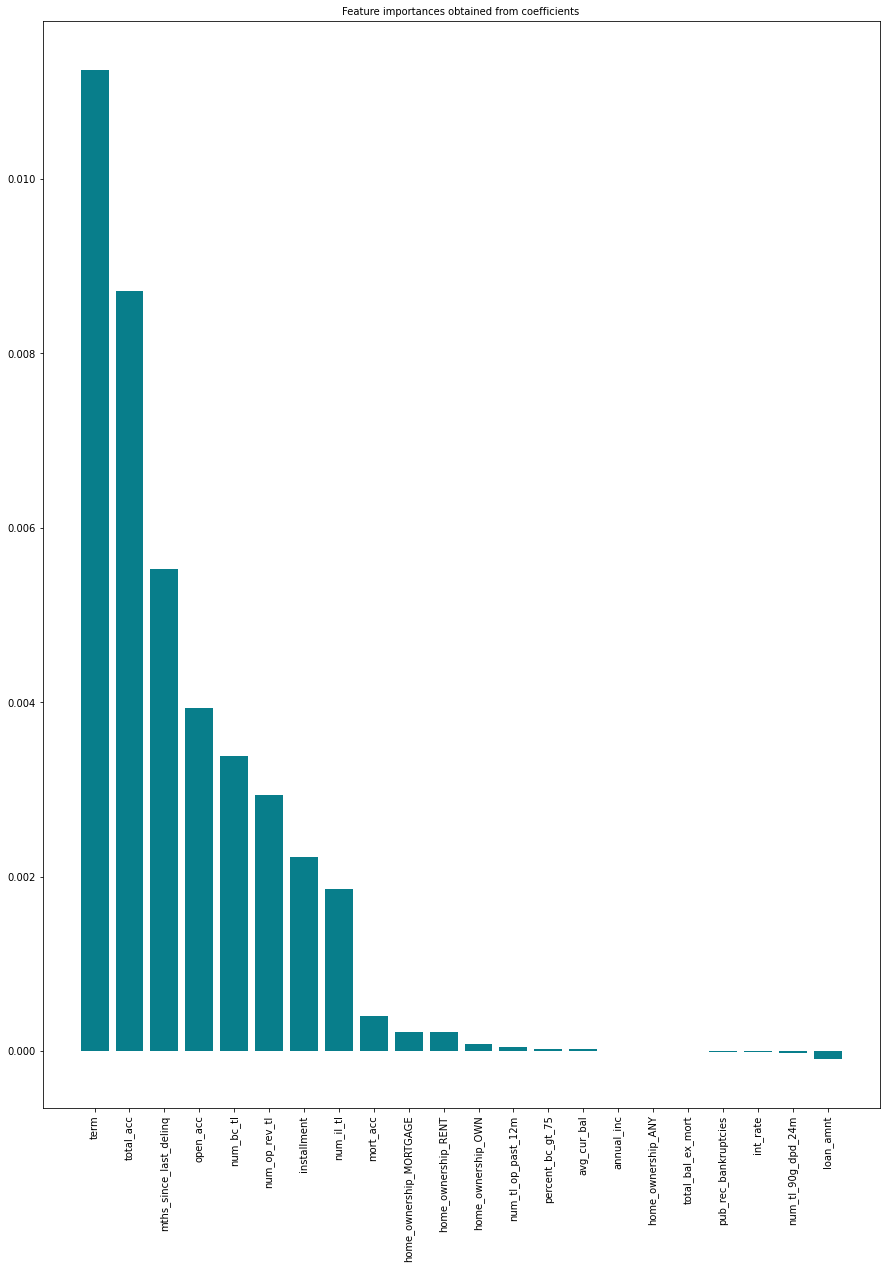

In [303]:
#Let's plot the important features
plt.figure(figsize=(15,20))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.savefig('features',dpi=300)
plt.show()

Upon checking the features, the term, total_ac, mths_since_last_delinq, open_acc were some features which is positively impacting the results. The loan_amount in the other hand is negatively impacting , which means as the amount of loan increases the repayment possibility decreases. This is an expected behaviour.

There are several features that doesnot have any impact in the prediction, that could be removed from the dataframe.

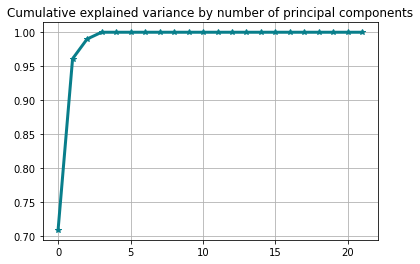

In [283]:
#Let's now use the PCA to identify the number of high contributing principal components 
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B', marker = '*')
plt.title('Cumulative explained variance by number of principal components', size=12)
plt.grid()
plt.show()

The PCA application shows that the first 4 principal components shared almost 100% of the variance.

# **Metrics**

## Accuracy

In [284]:
from sklearn import metrics
print("Accuracy_Score of Logistic Regression =", format(metrics.accuracy_score(y_test, y_pred_lr)))

Accuracy_Score of Logistic Regression = 0.7926216983191443


## Confusion Matrix

In [285]:
from sklearn.metrics import classification_report, confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [286]:
cm_lr

array([[   1, 1900],
       [   0, 7261]])

## Classification Report

In [287]:
cr_lr = classification_report(y_test, y_pred_lr)

In [288]:
print("Logistic Regression Classification Report:")
print(cr_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1901
           1       0.79      1.00      0.88      7261

    accuracy                           0.79      9162
   macro avg       0.90      0.50      0.44      9162
weighted avg       0.84      0.79      0.70      9162



## ROC-AUC

In [289]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  lr_pred_proba)

In [290]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

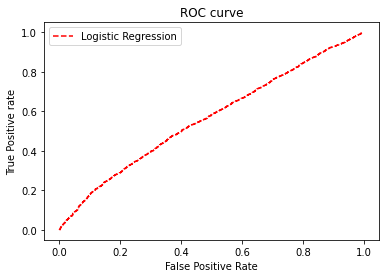

In [291]:
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='Logistic Regression')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Precision - Recall Curve

In [292]:
from sklearn.metrics import precision_recall_curve
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, lr_pred_proba)


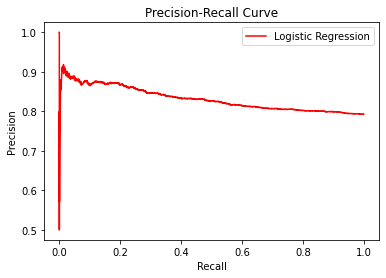

In [293]:
fig, ax = plt.subplots()
ax.plot(recall_lr, precision_lr, color='red',label='Logistic Regression')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='best')
#display plot
plt.show()

from sklearn.metrics import f1_score

In [294]:
from sklearn.metrics import f1_score

In [295]:
f1_score_lr = f1_score(y_test, y_pred_lr,average='weighted')

In [296]:
f1_score_lr

0.7010382535587134

#**Prediction System**

Let's now try to predict some random variables. 

In [297]:
X_train.iloc[3].values

array([3.9000e+04, 3.2499e+02, 9.6000e+03, 3.6000e+01, 1.3330e-01,
       4.1610e+03, 0.0000e+00, 6.4000e+01, 4.0000e+00, 3.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+02,
       1.0000e+00, 8.0000e+00, 1.2482e+04, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00])

In [298]:
y_train[3]

1

In [299]:
#let's take the above value 
test_values = np.array([3.9000e+04, 3.2499e+02, 9.6000e+03, 3.6000e+01, 1.3330e-01,
       4.1610e+03, 0.0000e+00, 6.4000e+01, 4.0000e+00, 3.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+02,
       1.0000e+00, 8.0000e+00, 1.2482e+04, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00])

In [300]:
#Prediction
y_pred_lr_final = lr_model.predict(test_values.reshape(1, -1))

In [301]:
print('Predicted Class: %d' % y_pred_lr_final)

Predicted Class: 1


In [302]:
#Final Outcome:
if y_pred_lr_final == 0:
  print("The Loan amount will needs to be Charged Off")
else:
  print("The loan amount will be paid off")

The loan amount will be paid off


!!!!!! The End  !!!!!!